In [1]:
from numpy import *
import sys
sys.path.insert(0, 'velocitySlamSeq//simulation')

In [2]:
sys.path.insert(0, 'velocitySlamSeq//slam_seq')
from gillespie import *

from neuron_sim import gene_trans_func_nonlinear as neuron_sim
from neuron_sim import create_initialize_simulation_results_nonlinear as init_neuron_sim

In [3]:
params = {'a': 0.1, 'b': 0.5, 'la': 0.7, 'alpha_a': 100, 'alpha_i': 1, 'sigma': 0.6, 'beta': 0.5, 'gamma': 0.1}
print('params_true = a: %.3f, b: %.3f, la: %.3f, alpha_a: %.3f, alpha_i: %.3f, sigma: %.3f, beta: %.3f, gamma: %.3f'\
      %(params['a'], params['b'], params['la'], params['alpha_a'], params['alpha_i'], params['sigma'], params['beta'], params['gamma']))

params_true = a: 0.100, b: 0.500, la: 0.700, alpha_a: 100.000, alpha_i: 1.000, sigma: 0.600, beta: 0.500, gamma: 0.100


In [4]:
trajs_T, trajs_C = simulate_Gillespie(*list(params.values()), C0=zeros((5, 1)), t_span=[0, 50], n_traj=50, report=True)


NameError: name 'simulate_Gillespie' is not defined

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
print(trajs_T[0].shape, trajs_C[0].shape)
trajs_T[0]

(11658,) (5, 11658)


array([ 0.        ,  0.54286533,  0.54560744, ..., 49.99023593,
       49.99483881, 50.00245372])

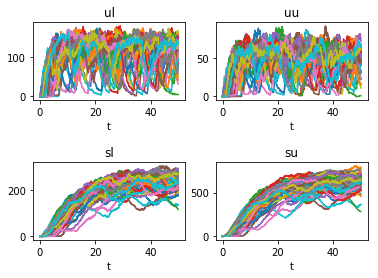

In [6]:
n_trajs = len(trajs_C)
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

for i in range(n_trajs):
    ax1.plot(trajs_T[i], trajs_C[i][1, :])
    ax2.plot(trajs_T[i], trajs_C[i][2, :])
    ax3.plot(trajs_T[i], trajs_C[i][3, :])
    ax4.plot(trajs_T[i], trajs_C[i][4, :])
ax1.set_xlabel('t')
ax1.set_title('ul')
ax2.set_xlabel('t')
ax2.set_title('uu')
ax3.set_xlabel('t')
ax3.set_title('sl')
ax4.set_xlabel('t')
ax4.set_title('su')
plt.subplots_adjust(hspace=0.8)

In [7]:
from gillespie import *
T = linspace(0, 45, 46)
n_species, gene_num = 5, 1;
n_mean = zeros((n_species, len(T)))
n_2mom = zeros((n_species, len(T)))
for j in range(5):
    n_mean[j] = temporal_average( T, trajs_T, trajs_C, j);
    n_2mom[j] = temporal_average( T, trajs_T, trajs_C, j, lambda x : x*(x-1));
n_var = n_2mom + n_mean - n_mean**2;

print(n_mean.shape, n_2mom.shape)

(5, 46) (5, 46)


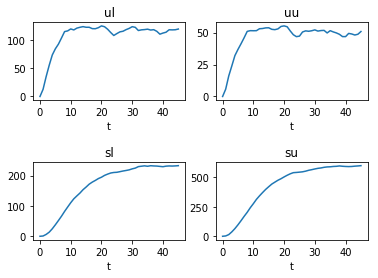

In [8]:
plt.subplot(2, 2, 1)
plt.plot(T, n_mean[1, :])
plt.xlabel('t')
plt.title('ul')

plt.subplot(2, 2, 2)
plt.plot(T, n_mean[2, :])
plt.xlabel('t')
plt.title('uu')

plt.subplot(2, 2, 3)
plt.plot(T, n_mean[3, :])
plt.xlabel('t')
plt.title('sl')

plt.subplot(2, 2, 4)
plt.plot(T, n_mean[4, :])
plt.xlabel('t')
plt.title('su')
plt.subplots_adjust(hspace=0.8)

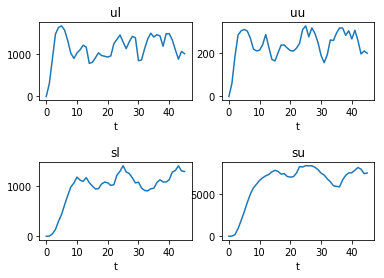

In [9]:
plt.subplot(2, 2, 1)
plt.plot(T, n_var[1, :])
plt.xlabel('t')
plt.title('ul')

plt.subplot(2, 2, 2)
plt.plot(T, n_var[2, :])
plt.xlabel('t')
plt.title('uu')

plt.subplot(2, 2, 3)
plt.plot(T, n_var[3, :])
plt.xlabel('t')
plt.title('sl')

plt.subplot(2, 2, 4)
plt.plot(T, n_var[4, :])
plt.xlabel('t')
plt.title('su')
plt.subplots_adjust(hspace=0.8)

In [10]:
T2 = linspace(0, 45, 5)
trajs_C_interp = temporal_interp(T2, trajs_T, trajs_C)

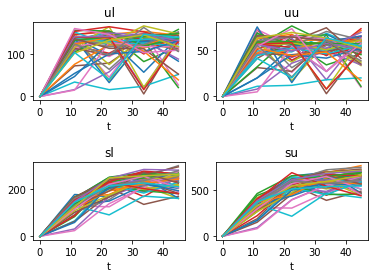

In [11]:
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

for i in range(n_trajs):
    ax1.plot(T2, trajs_C_interp[i][1, :])
    ax2.plot(T2, trajs_C_interp[i][2, :])
    ax3.plot(T2, trajs_C_interp[i][3, :])
    ax4.plot(T2, trajs_C_interp[i][4, :])
ax1.set_xlabel('t')
ax1.set_title('ul')
ax2.set_xlabel('t')
ax2.set_title('uu')
ax3.set_xlabel('t')
ax3.set_title('sl')
ax4.set_xlabel('t')
ax4.set_title('su')
plt.subplots_adjust(hspace=0.8)

In [12]:
from anndata import AnnData
import pandas as pd
from scipy.sparse import csc_matrix

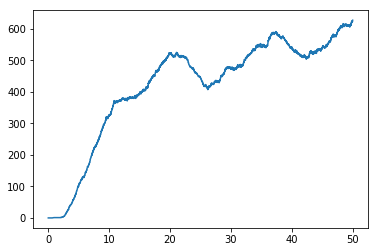

In [19]:
plt.plot(trajs_T[i], trajs_C[i][4, :])
plt.show()

In [13]:
# var = pd.DataFrame({'gene_short_name': ['gene A']})
# var.set_index('gene_short_name', inplace = True)

# # provide more annotation for cells next:
# cell_ids = ['cell_%d'%(i) for i in range(n_trajs)]
# obs = pd.DataFrame({'cell_name': cell_ids, 'CellID': cell_ids, 'SampleID': cell_ids})
# obs.set_index('CellID', inplace = True)
# print(obs.head())
# print(obs.shape)

# data = []
# for i in range(len(T2)):
#     uu = trajs_C_interp[:, 1, i]
#     ul = trajs_C_interp[:, 2, i]
#     su = trajs_C_interp[:, 3, i]
#     sl = trajs_C_interp[:, 4, i]
#     uu_adata = AnnData(array([uu]).transpose(), obs, var, obsm = obs, varm = var)
#     ul_adata = AnnData(array([uu]).transpose(), obs, var, obsm = obs, varm = var)
#     su_adata = AnnData(array([uu]).transpose(), obs, var, obsm = obs, varm = var)
#     sl_adata = AnnData(array([uu]).transpose(), obs, var, obsm = obs, varm = var)
#     data.append((T2[i], uu_adata, ul_adata, su_adata, sl_adata))